### 5_Univariate Analysis Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.  

Don't forget to apply the most suitable missing-value-filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions (1-4) after you handle the missing values.  

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:  

Answer the following questions as you work through this assignment, and then submit a link to your Notebook.  

1, Derive the descriptive statistics of the data and discuss the points you find remarkable.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datasets/states_all.csv')
cols = df.columns


In [2]:
# columns with missing values more than 50%
cols_to_drop = cols[np.where((df.isnull().sum())/len(df) > 0.5)].to_list()
df.drop(cols_to_drop, axis=1, inplace=True)  # drop columns

# build new dataframe with the data types and counts

edu_datatype = pd.concat([df.dtypes, df.nunique(), round(df.nunique()*100/len(df), 2),
                          df.isnull().sum(), round(df.isnull().sum()*100/len(df), 2)], axis=1)
edu_datatype.columns = ['data type', 'No. of categories',
                        'No. of categories %', 'missing values', 'missing values %']
edu_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

edu_datatype = edu_datatype.loc[edu_datatype['missing values'] != 0]

# impute median values to Null
df_time_series_imputed_median = df.copy(deep=True)

for col in df.columns:
    if col in edu_datatype.index:
        df_time_series_imputed_median[col] = df_time_series_imputed_median[col].fillna(
            df_time_series_imputed_median[col].median())

df_time_series_imputed_median.isnull().sum()/len(df_time_series_imputed_median)

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
dtype: float64

In [3]:
df_time_series_imputed_median.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,649933.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,271704.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,405111.5,186919.0,731634.0
1,1992_ALASKA,ALASKA,1992,649933.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,271704.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,405111.5,186919.0,122487.0
2,1992_ARIZONA,ARIZONA,1992,649933.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,271704.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,405111.5,186919.0,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,649933.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,271704.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,405111.5,186919.0,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,271704.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,405111.5,186919.0,5254844.0


In [5]:
df_time_series_imputed_median.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1715.00000,1715.000000,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03
mean,2002.075219,8.409261e+05,8.071645e+06,6.743326e+05,3.791186e+06,3.584183e+06,8.189349e+06,4.226732e+06,2.385717e+06,3.846453e+05,8.026293e+05,16874.28105,67809.688630,68194.730029,67127.643732,57500.714286,5.079104e+05,2.463393e+05,9.009913e+05
std,9.568621,9.089854e+05,1.028917e+07,1.001591e+06,4.841024e+06,4.816898e+06,1.048349e+07,5.509629e+06,2.938210e+06,4.573738e+05,1.158986e+06,28607.51285,78818.783078,78117.005891,76178.524321,65911.908766,5.279302e+05,2.653303e+05,1.031617e+06
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.00000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,2.608130e+05,2536.50000,20944.000000,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.00000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,8.122720e+05,19689.00000,75726.000000,77052.000000,76719.500000,68023.000000,4.815905e+05,2.528075e+05,1.002840e+06
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.00000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06


In [7]:
df_time_series_imputed_median.describe(include='O')

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,1992_ALABAMA,ALABAMA
freq,1,33


2, Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.  


In [8]:
#Soudeh

df_new = df_time_series_imputed_median.set_index('YEAR', drop=True)
df_new.head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
YEAR,,,,,,,,,,,,,,,,,,,,
1992,1992_ALABAMA,ALABAMA,649933.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,271704.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,405111.5,186919.0,731634.0
1992,1992_ALASKA,ALASKA,649933.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,271704.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,405111.5,186919.0,122487.0
1992,1992_ARIZONA,ARIZONA,649933.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,271704.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,405111.5,186919.0,673477.0
1992,1992_ARKANSAS,ARKANSAS,649933.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,271704.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,405111.5,186919.0,441490.0
1992,1992_CALIFORNIA,CALIFORNIA,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,271704.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,405111.5,186919.0,5254844.0


In [9]:
df_new.sort_index(inplace=True)

In [10]:
df_new['Deficit'] = df_new['TOTAL_EXPENDITURE']-df_new['TOTAL_REVENUE']
df_new.loc[df_new['STATE']=='CALIFORNIA']

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Deficit
YEAR,,,,,,,,,,,,,,,,,,,,,
1986,1986_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,380608.0,325902.0,304787.0,251281.0,405111.5,186919.0,4377989.0,156846.0
1987,1987_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,392112.0,335078.0,311579.0,266028.0,405111.5,186919.0,4488398.0,156846.0
1988,1988_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,403237.0,352076.0,318856.0,257450.0,405111.5,186919.0,4618120.0,156846.0
1989,1989_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,410631.0,379538.0,330967.0,243023.0,405111.5,186919.0,4771978.0,156846.0
1990,1990_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,423740.0,399293.0,347479.0,244142.0,405111.5,186919.0,4950474.0,156846.0
1991,1991_CALIFORNIA,CALIFORNIA,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,1525471.0,...,510428.0,8258.0,428392.0,412613.0,355168.0,260693.0,405111.5,186919.0,5107145.0,156846.0
1992,1992_CALIFORNIA,CALIFORNIA,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,405111.5,186919.0,5254844.0,878807.0
1993,1993_CALIFORNIA,CALIFORNIA,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,...,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,405111.5,186919.0,5327231.0,67648.0
1994,1994_CALIFORNIA,CALIFORNIA,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,...,1916061.0,66450.0,448237.0,426919.0,388561.0,285132.0,405111.5,186919.0,5407475.0,-428157.0


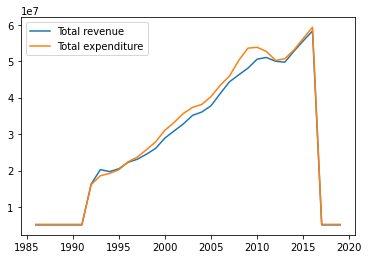

In [11]:
tx_df = df_time_series_imputed_median[df_time_series_imputed_median['STATE']=='TEXAS']
tx_df = tx_df.sort_values(by=['YEAR'])
plt.plot(tx_df['YEAR'], tx_df['TOTAL_REVENUE'], label='Total revenue')
plt.plot(tx_df['YEAR'], tx_df['TOTAL_EXPENDITURE'], label='Total expenditure')
plt.plot(tx_df['YEAR'], tx_df['TOTAL_EXPENDITURE'], label='Total expenditure')

plt.legend(loc='upper left') 


In [15]:
tx_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
1576,1986_TEXAS,TEXAS,1986,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,271704.0,510428.0,62804.0,248628.0,245742.0,236791.0,187279.0,405111.5,186919.0,3209515.0
1577,1987_TEXAS,TEXAS,1987,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,271704.0,510428.0,70739.0,258953.0,247433.0,234498.0,182734.0,405111.5,186919.0,3236787.0
1578,1988_TEXAS,TEXAS,1988,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,271704.0,510428.0,77548.0,251418.0,255832.0,237387.0,201762.0,405111.5,186919.0,3283707.0
1579,1989_TEXAS,TEXAS,1989,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,271704.0,510428.0,82711.0,250752.0,268064.0,238057.0,192963.0,405111.5,186919.0,3328514.0
1580,1990_TEXAS,TEXAS,1990,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,271704.0,510428.0,92172.0,257586.0,274159.0,246418.0,178390.0,405111.5,186919.0,3382887.0


3, In your chosen state, in which of the lessons are the students more successful—math or reading?  


In [13]:
df_grades = pd.read_csv('Datasets/states_all.csv')
df_grades.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [14]:
df_grades.loc[df_grades['STATE']=='CALIFORNIA', ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,11.000000,12.000000,13.000000,11.000000
mean,227.909091,269.166667,208.230769,255.000000
std,8.960519,6.965282,5.614770,4.898979
min,208.000000,256.000000,197.000000,250.000000
25%,228.500000,265.500000,206.000000,251.000000
50%,232.000000,270.000000,209.000000,253.000000
75%,233.000000,275.250000,213.000000,259.000000
max,235.000000,277.000000,216.000000,263.000000


Math is more successful

4, What are the distributions of the math and reading scores in the sample?  
 

<AxesSubplot:ylabel='Frequency'>

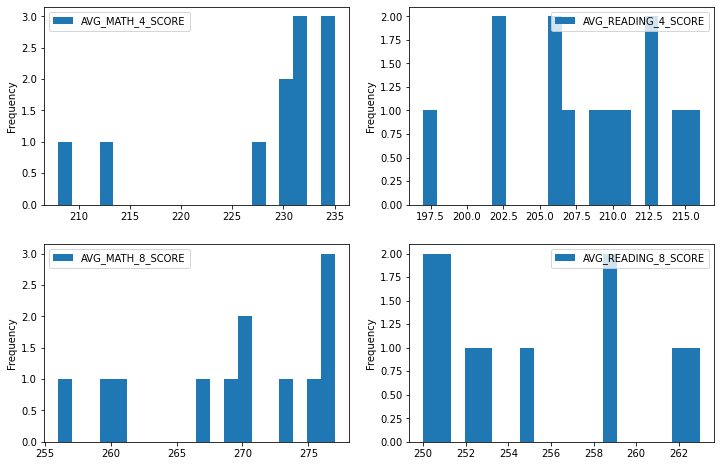

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
df_grades.loc[df_grades['STATE']=='CALIFORNIA', ['AVG_MATH_4_SCORE']].plot(kind='hist', bins=20, ax=ax[0,0])
df_grades.loc[df_grades['STATE']=='CALIFORNIA', ['AVG_READING_4_SCORE']].plot(kind='hist', bins=20, ax=ax[0,1])
df_grades.loc[df_grades['STATE']=='CALIFORNIA', ['AVG_MATH_8_SCORE']].plot(kind='hist', bins=20, ax=ax[1,0])
df_grades.loc[df_grades['STATE']=='CALIFORNIA', ['AVG_READING_8_SCORE']].plot(kind='hist', bins=20, ax=ax[1,1])

5, Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables. 

In [23]:
df_grades.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [24]:
df_grades_imputed_median = df_grades.copy(deep=True)
for col in ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']:
    df_grades_imputed_median[col] = df_grades_imputed_median[col].fillna(df_grades_imputed_median[col].median())


In [25]:
df_grades_imputed_mean = df_grades.copy(deep=True)
for col in ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']:
    df_grades_imputed_mean[col] = df_grades_imputed_mean[col].fillna(
        df_grades_imputed_mean[col].mean())


In [26]:
df_grades_interpolated = df_grades.copy(deep=True)
for col in ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']:
    df_grades_interpolated[col] = df_grades_interpolated[col].interpolate(method='linear', limit_direction='forward')


<AxesSubplot:ylabel='Frequency'>

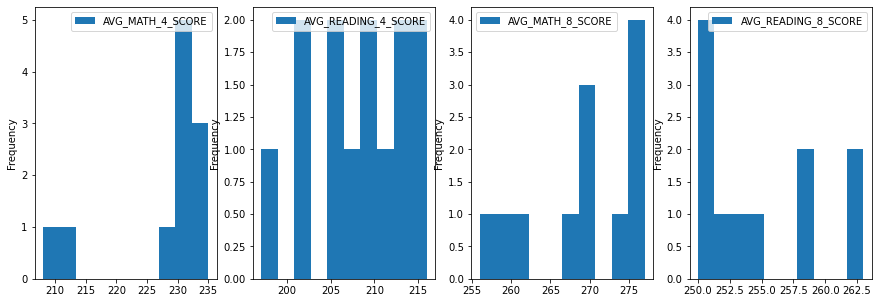

In [40]:
fig, ax = plt.subplots(1,4, figsize=(15,5))

df_grades.loc[df_grades['STATE'] == 'CALIFORNIA', ['AVG_MATH_4_SCORE']].plot(kind='hist', ax=ax[0])
df_grades.loc[df_grades['STATE'] == 'CALIFORNIA', ['AVG_READING_4_SCORE']].plot(kind='hist', ax=ax[1])
df_grades.loc[df_grades['STATE'] == 'CALIFORNIA', ['AVG_MATH_8_SCORE']].plot(kind='hist', ax=ax[2])
df_grades.loc[df_grades['STATE'] == 'CALIFORNIA', ['AVG_READING_8_SCORE']].plot(kind='hist', ax=ax[3])



<AxesSubplot:ylabel='Frequency'>

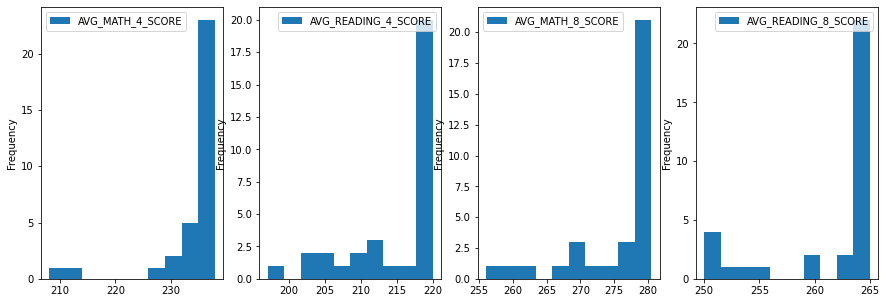

In [37]:
fig, ax = plt.subplots(1,4, figsize=(15,5))

df_grades_imputed_median.loc[df_grades_imputed_median['STATE'] == 'CALIFORNIA', ['AVG_MATH_4_SCORE']].plot(kind='hist', ax=ax[0])
df_grades_imputed_median.loc[df_grades_imputed_median['STATE'] == 'CALIFORNIA', ['AVG_READING_4_SCORE']].plot(kind='hist', ax=ax[1])
df_grades_imputed_median.loc[df_grades_imputed_median['STATE'] == 'CALIFORNIA', ['AVG_MATH_8_SCORE']].plot(kind='hist', ax=ax[2])
df_grades_imputed_median.loc[df_grades_imputed_median['STATE'] == 'CALIFORNIA', ['AVG_READING_8_SCORE']].plot(kind='hist', ax=ax[3])


<AxesSubplot:ylabel='Frequency'>

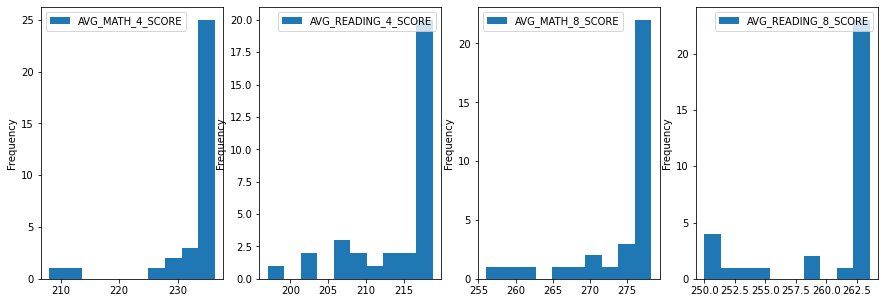

In [38]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

df_grades_imputed_mean.loc[df_grades_imputed_mean['STATE'] == 'CALIFORNIA', [
    'AVG_MATH_4_SCORE']].plot(kind='hist', ax=ax[0])
df_grades_imputed_mean.loc[df_grades_imputed_mean['STATE'] == 'CALIFORNIA', [
    'AVG_READING_4_SCORE']].plot(kind='hist', ax=ax[1])
df_grades_imputed_mean.loc[df_grades_imputed_mean['STATE'] == 'CALIFORNIA', [
    'AVG_MATH_8_SCORE']].plot(kind='hist', ax=ax[2])
df_grades_imputed_mean.loc[df_grades_imputed_mean['STATE'] == 'CALIFORNIA', [
    'AVG_READING_8_SCORE']].plot(kind='hist', ax=ax[3])


<AxesSubplot:ylabel='Frequency'>

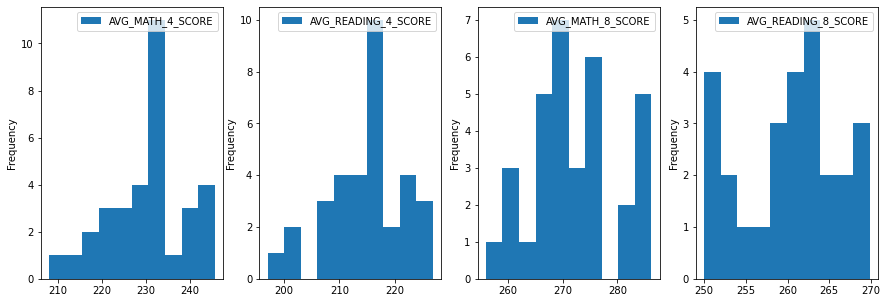

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

df_grades_interpolated.loc[df_grades_interpolated['STATE'] == 'CALIFORNIA', [
    'AVG_MATH_4_SCORE']].plot(kind='hist', ax=ax[0])
df_grades_interpolated.loc[df_grades_interpolated['STATE'] == 'CALIFORNIA', [
    'AVG_READING_4_SCORE']].plot(kind='hist', ax=ax[1])
df_grades_interpolated.loc[df_grades_interpolated['STATE'] == 'CALIFORNIA', [
    'AVG_MATH_8_SCORE']].plot(kind='hist', ax=ax[2])
df_grades_interpolated.loc[df_grades_interpolated['STATE'] == 'CALIFORNIA', [
    'AVG_READING_8_SCORE']].plot(kind='hist', ax=ax[3])


In [41]:
# create a function

def visualization(df, title):
    fig, ax = plt.subplots(1,4, figsize=(15,5))

    df.loc[df['STATE'] == 'CALIFORNIA', ['AVG_MATH_4_SCORE']].plot(kind='hist', ax=ax[0])
    df.loc[df['STATE'] == 'CALIFORNIA', ['AVG_READING_4_SCORE']].plot(kind='hist', ax=ax[1])
    df.loc[df['STATE'] == 'CALIFORNIA', ['AVG_MATH_8_SCORE']].plot(kind='hist', ax=ax[2])
    df.loc[df['STATE'] == 'CALIFORNIA', ['AVG_READING_8_SCORE']].plot(kind='hist', ax=ax[3])
    
    ax[0].set_xlabel('AVG_MATH_4_SCORE')
    ax[0].set_title(f'{title}')

    ax[1].set_xlabel('AVG_READING_4_SCORE')
    ax[1].set_title(f'{title}')

    ax[2].set_xlabel('AVG_MATH_8_SCORE')
    ax[2].set_title(f'{title}')

    ax[3].set_xlabel('AVG_READING_8_SCORE')
    ax[3].set_title(f'{title}')


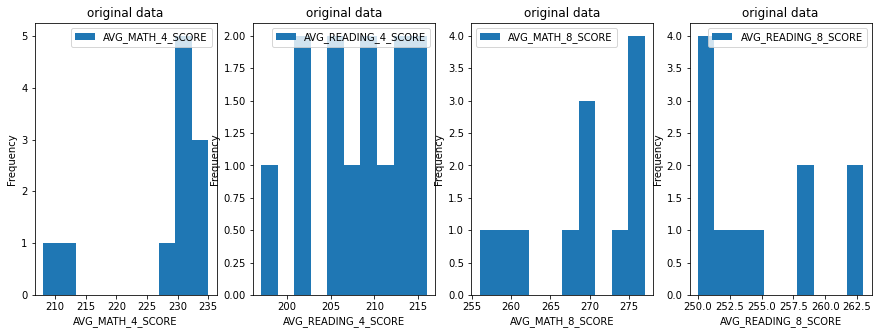

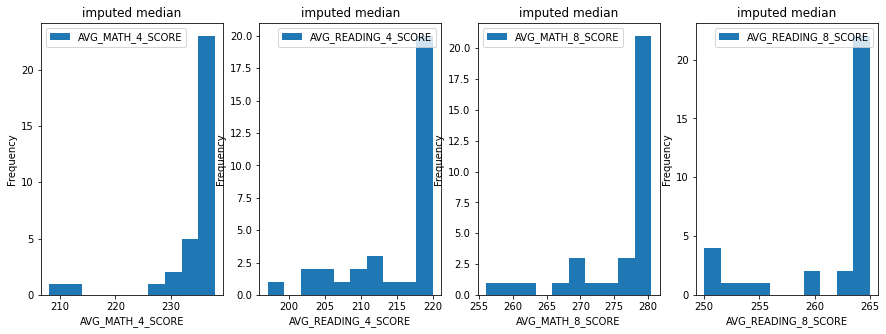

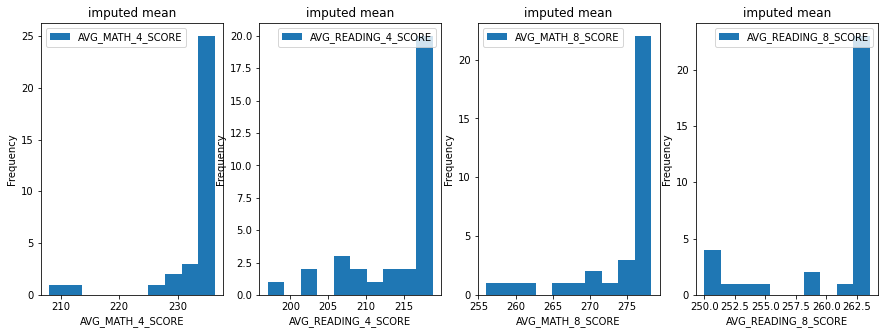

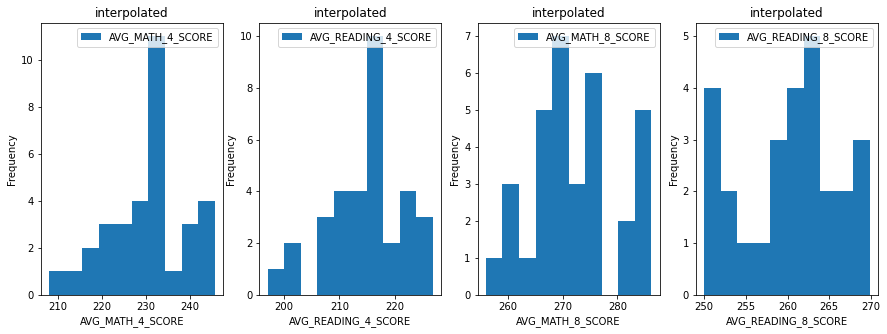

In [43]:
visualization(df_grades, 'original data')
visualization(df_grades_imputed_median, 'imputed median')
visualization(df_grades_imputed_mean, 'imputed mean')
visualization(df_grades_interpolated, 'interpolated')
